In [47]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape, Point
import matplotlib.pyplot as plt

# from shapely.geometry import shape, Point
# import pandas as pd
import json

be mindful of "-83.61155885,"

In [48]:
'''# grafana filtered (old sites removed)
df = pd.read_csv('Locations-grafana.csv')

df = df.dropna(subset=['Node ID'])
df = df[df['Node ID'].str.endswith('A')]

subset_df = pd.read_csv('Locations-HuronWatershed.csv')

# Step 2: Extract sensor IDs from subset_df
subset_sensor_ids = subset_df['Site ID'].tolist()  # Adjust 'sensor_id' based on your column name

# Step 3: Filter df to remove rows with sensor IDs present in subset_df
df = df[~df['Site ID'].isin(subset_sensor_ids)]

print(df.head())
print(df.tail())

df = df[(df['Latitude, Longitude'].notna()) & (df['Latitude, Longitude'] != '?')]

# Split the column containing "lat lon" into separate latitude and longitude columns
print(len(df['Latitude, Longitude']))

df[['lat', 'lon']] = df['Latitude, Longitude'].str.split(', ', expand=True)
# df[['lat', 'lon']] = df['Latitude, Longitude'].str.split(',', expand=True)
print(len(df['lat']))
print(len(df['lon']))
df = df.dropna(subset=['lon', 'lat'])
print(len(df['lat']))
print(len(df['lon']))
del df['Latitude, Longitude']

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
crs = {'init': 'epsg:4326'}  # assuming WGS84 coordinates
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs=crs)

# Convert to GeoJSON
output_geojson = 'Huron_sensors.geojson'
gdf.to_file(output_geojson, driver='GeoJSON')'''


'# grafana filtered (old sites removed)\ndf = pd.read_csv(\'Locations-grafana.csv\')\n\ndf = df.dropna(subset=[\'Node ID\'])\ndf = df[df[\'Node ID\'].str.endswith(\'A\')]\n\nsubset_df = pd.read_csv(\'Locations-HuronWatershed.csv\')\n\n# Step 2: Extract sensor IDs from subset_df\nsubset_sensor_ids = subset_df[\'Site ID\'].tolist()  # Adjust \'sensor_id\' based on your column name\n\n# Step 3: Filter df to remove rows with sensor IDs present in subset_df\ndf = df[~df[\'Site ID\'].isin(subset_sensor_ids)]\n\nprint(df.head())\nprint(df.tail())\n\ndf = df[(df[\'Latitude, Longitude\'].notna()) & (df[\'Latitude, Longitude\'] != \'?\')]\n\n# Split the column containing "lat lon" into separate latitude and longitude columns\nprint(len(df[\'Latitude, Longitude\']))\n\ndf[[\'lat\', \'lon\']] = df[\'Latitude, Longitude\'].str.split(\', \', expand=True)\n# df[[\'lat\', \'lon\']] = df[\'Latitude, Longitude\'].str.split(\',\', expand=True)\nprint(len(df[\'lat\']))\nprint(len(df[\'lon\']))\ndf = df.dr

In [49]:
# grafana csv only
'''
This section will take the csv from airtable and make it into a geojson to use in the next chunk
'''


# Read the CSV file

df = pd.read_csv('Locations-HuronWatershed.csv')

print(df.head())

# df = df.dropna(subset=['Site ID'])
# df = df[df['Site ID'].str.endswith('A')]

# Filter rows where 'Latitude, Longitude' is not empty and does not contain '?'
# df = df[(df['Latitude, Longitude'].notna()) & (df['Latitude, Longitude'] != '?')]

# Split the column containing "lat lon" into separate latitude and longitude columns
print(len(df['Latitude, Longitude']))

df[['lat', 'lon']] = df['Latitude, Longitude'].str.split(', ', expand=True)
# df[['lat', 'lon']] = df['Latitude, Longitude'].str.split(',', expand=True)
print("look here")
print(len(df['lat']))
print(len(df['lon']))
# df = df.dropna(subset=['lon', 'lat'])
print("look here")
print(len(df['lat']))
print(len(df['lon']))
del df['Latitude, Longitude']

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
crs = {'init': 'epsg:4326'}  # assuming WGS84 coordinates
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs=crs)

# Convert to GeoJSON
output_geojson = 'Huron_sensors.geojson'
gdf.to_file(output_geojson, driver='GeoJSON')


  Site ID               Site Name Date Deployed  \
0  ARB002   Ellsworth South Inlet      6/3/2016   
1  ARB003  Ellsworth North Inlet       6/3/2016   
2  ARB006       Hilton Garden Inn     6/24/2016   
3  ARB012       North Territorial    11/17/2016   
4  ARB013           Kensington Rd    11/17/2016   

                                               Notes        Project  \
0                                                NaN  Washtenaw Co.   
1  Footpath into the woods across the street from...  Washtenaw Co.   
2                            included in OHM project  Washtenaw Co.   
3  HRWC ID MH01. Possible obstruction from bridge...           HRWC   
4  HRWC ID HR03B. Located at bridge, not dam. Pre...           HRWC   

  Node Type (from Devices (Phase 2))      Latitude, Longitude  \
0                              Depth  42.2298997, -83.7244034   
1                              Depth    42.232435, -83.723137   
2                              Depth  42.2388209, -83.7504892   
3     

/Users/shinapatel/anaconda3/envs/geo_env/lib/python3.12/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [50]:

# Read GeoJSON file into GeoDataFrame
file_path = 'Huron_sensors.geojson'
gdf = gpd.read_file(file_path)

# Convert 'lat' and 'lon' columns to numeric (in case they are strings)
gdf['lat'] = pd.to_numeric(gdf['lat'])
gdf['lon'] = pd.to_numeric(gdf['lon'])

# Filter based on conditions
gdf = gdf[(gdf['lat'] <= 43) & (gdf['lon'] > -85)]

# Print the filtered GeoDataFrame (optional)
# print(filtered_gdf)

# Save the filtered GeoDataFrame back to GeoJSON (optional)
filtered_file_path = 'Huron_sensors.geojson'
gdf.to_file(filtered_file_path, driver='GeoJSON')

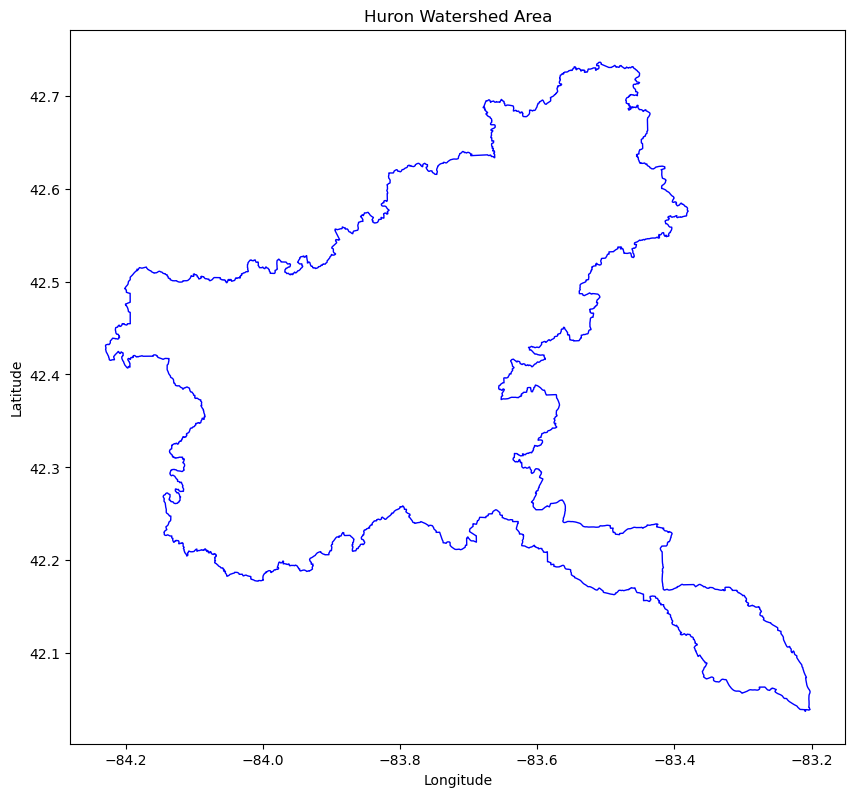

In [51]:
file_path = "Huron_Watershed.geojson"
gdf = gpd.read_file(file_path)

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, facecolor='none', edgecolor='blue')  # Adjust colors as needed
ax.set_title('Huron Watershed Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Text(81.14811467980415, 0.5, 'Latitude')

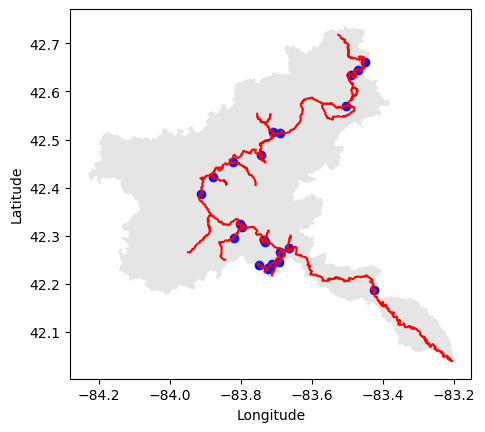

In [52]:
# Load GeoJSON files into GeoDataFrames
sensor_file = 'Huron_sensors.geojson'
river_file = 'Huron_RiverSystem.geojson'
watershed_file = "Huron_Watershed.geojson"

sensor = gpd.read_file(sensor_file)
river = gpd.read_file(river_file)
watershed = gpd.read_file(watershed_file)

# Plot GeoDataFrames on the same plot
ax = sensor.plot(color='blue', label='DWL @ UM sensors')
river.plot(ax=ax, color='red', label='Rivers')
watershed.plot(ax=ax, color='gray', label='Watershed', alpha = 0.2)

# Add legends and labels
# ax.legend()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')



In [53]:
df.to_csv('final_nodes.csv', index=False)
pd.set_option('display.max_rows', None)
print(df)

   Site ID                         Site Name Date Deployed  \
0   ARB002             Ellsworth South Inlet      6/3/2016   
1   ARB003            Ellsworth North Inlet       6/3/2016   
2   ARB006                 Hilton Garden Inn     6/24/2016   
3   ARB012                 North Territorial    11/17/2016   
4   ARB013                     Kensington Rd    11/17/2016   
5   ARB015                    Chalmers Drain     6/21/2021   
6   ARB017        Woodruff Creek Autosampler     12/2/2020   
7   ARB018                   Mary Beth Doyle    11/18/2016   
8   ARB025            Huron R. @ Maiden Lane     5/29/2018   
9   ARB026               South Commerce Lake     8/18/2018   
10  ARB027           Huron R. @ Huron R. Dr.      6/7/2018   
11  ARB028            Honey / Huron @ Wagner      6/7/2018   
12  ARB032                 Cedar Island Lake     8/24/2018   
13  ARB034       Huron @ Shotwell/Oxbow Lake     6/18/2021   
14  ARB048              Honey Creek @ Dexter     8/27/2019   
15  ARB0

In [54]:
watershed_file = 'Huron_Watershed.geojson'
watershed_gdf = gpd.read_file(watershed_file)

# Step 2: Load sensor data from CSV
sensors_file = 'final_nodes.csv'
sensors_df = pd.read_csv(sensors_file)

# Step 3: Convert CSV data to GeoDataFrame
# Assuming your CSV has columns 'latitude' and 'longitude'
sensors_geometry = [Point(xy) for xy in zip(sensors_df.lon, sensors_df.lat)]
sensors_gdf = gpd.GeoDataFrame(sensors_df, crs='EPSG:4326', geometry=sensors_geometry)

# Step 4: Convert the Huron River watershed polygon to Shapely geometry
huron_watershed_polygon = shape(watershed_gdf.geometry.iloc[0])

# Step 5: Filter sensors that intersect with the Huron River watershed polygon
sensors_within_watershed = sensors_gdf[sensors_gdf.geometry.apply(lambda x: x.intersects(huron_watershed_polygon))]

# Step 6: Print or save the filtered sensors
print(sensors_within_watershed)

# Optionally, save the filtered sensors to a new CSV file
output_file = 'sensors_within_huron_watershed.geojson'
output_csv_file = 'sensors_within_huron_watershed.csv'
sensors_within_watershed.to_file(output_file, driver='GeoJSON')
sensors_within_watershed.to_csv(output_csv_file, index='False')

   Site ID                         Site Name Date Deployed  \
0   ARB002             Ellsworth South Inlet      6/3/2016   
1   ARB003            Ellsworth North Inlet       6/3/2016   
2   ARB006                 Hilton Garden Inn     6/24/2016   
3   ARB012                 North Territorial    11/17/2016   
4   ARB013                     Kensington Rd    11/17/2016   
5   ARB015                    Chalmers Drain     6/21/2021   
6   ARB017        Woodruff Creek Autosampler     12/2/2020   
7   ARB018                   Mary Beth Doyle    11/18/2016   
8   ARB025            Huron R. @ Maiden Lane     5/29/2018   
9   ARB026               South Commerce Lake     8/18/2018   
10  ARB027           Huron R. @ Huron R. Dr.      6/7/2018   
11  ARB028            Honey / Huron @ Wagner      6/7/2018   
12  ARB032                 Cedar Island Lake     8/24/2018   
13  ARB034       Huron @ Shotwell/Oxbow Lake     6/18/2021   
14  ARB048              Honey Creek @ Dexter     8/27/2019   
15  ARB0

Text(81.14811467980415, 0.5, 'Latitude')

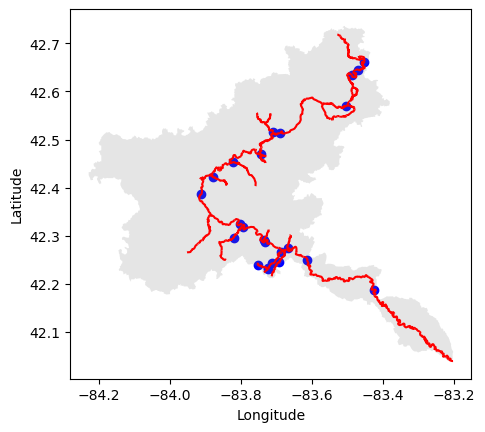

In [55]:
# Load GeoJSON files into GeoDataFrames
# sensor_file = 'sensors_within_huron_watershed.geojson'
sensor_file = 'Huron_DigiWa_Sensors (2).geojson'
river_file = 'Huron_RiverSystem.geojson'
watershed_file = "Huron_Watershed.geojson"

sensor = gpd.read_file(sensor_file)
river = gpd.read_file(river_file)
watershed = gpd.read_file(watershed_file)

# Plot GeoDataFrames on the same plot
ax = sensor.plot(color='blue', label='DWL @ UM sensors')
river.plot(ax=ax, color='red', label='Rivers')
watershed.plot(ax=ax, color='gray', label='Watershed', alpha = 0.2)

# Add legends and labels
# ax.legend()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')